In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
def preprocess(pixels):
  images = []
  for i in range(len(pixels)):
    img = np.fromstring(pixels[i], dtype='float32', sep=' ')
    img = img / 255.0
    img = img.reshape(48,48,1)
    images.append(img)
  return images

In [ ]:
df = pd.read_csv('/content/icml_face_data.csv')
sample_subset = [3,4,0]
train = df.groupby('Usage').get_group('Training')
train = train.loc[train['emotion'].isin(sample_subset)]
print(train.emotion.value_counts())
x_train = np.array(preprocess(train['pixels'].to_numpy()))
y_train = np.array(train['emotion'])
y_dict = {3:0, 4:1, 0:2}
y_train = np.array([y_dict[value] for value in y_train])


testing = df.groupby('Usage').get_group('PublicTest')
testing = testing.append(df.groupby('Usage').get_group('PrivateTest'))
testing = testing.loc[testing['emotion'].isin(sample_subset)]
print(testing.emotion.value_counts())
x_test = np.array(preprocess(testing['pixels'].to_numpy()))
y_test = np.array(testing['emotion'])
y_test = np.array([y_dict[value] for value in y_test])

3    7215
4    4830
0    3995
Name: emotion, dtype: int64
3    1774
4    1247
0     958
Name: emotion, dtype: int64


In [ ]:
TrainData = ImageDataGenerator(
    width_shift_range= 0.2, height_shift_range= 0.2,
    rotation_range= 90, rescale = 1/255,
    horizontal_flip= True, vertical_flip=True)
    
ValidData = ImageDataGenerator(
    horizontal_flip=True)
    
columns = ['emotion', 'Usage', 'pixels']    

train_generator = TrainData.flow_from_dataframe(
            dataframe=train, directory="/content/train", 
            x_col="id", y_col= columns, 
            class_mode="categorical", target_size=(128,128), 
            batch_size= 32)
            
valid_generator = ValidData.flow_from_dataframe(
            dataframe=testing, directory="/content/test", 
            x_col="id", y_col= columns, 
            class_mode="categorical", target_size=(128,128), 
            batch_size=32)   

KeyError: ignored

In [ ]:
def create_model():
  model = tf.keras.models.Sequential()
  #model.add(base_model)
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='elu', padding='same', input_shape=(48,48,1), data_format='channels_last'))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = 'same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = 'same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding = 'same'))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = 'same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding = 'same'))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1024, activation='elu'))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model

In [ ]:
def create_model_1():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
def create_model_2():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
def learning_curves(history, epochs):
  plt.plot(range(1,epochs+1), history['val_accuracy'], label='validation accuracy')
  plt.plot(range(1,epochs+1), history['accuracy'], label='training accuracy')
  plt.legend()
  plt.title('Learning curves')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

In [ ]:
def main(model_to_create):
  model = model_to_create
  callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
  history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), shuffle=True, callbacks=[callback])
  return history

In [ ]:
history = main(create_model())

Epoch 1/50
502/502 [==============================] - 20s 8ms/step - loss: 0.9508 - accuracy: 0.5388 - val_loss: 0.8317 - val_accuracy: 0.6230
Epoch 2/50
502/502 [==============================] - 4s 7ms/step - loss: 0.8114 - accuracy: 0.6275 - val_loss: 0.7702 - val_accuracy: 0.6522
Epoch 3/50
502/502 [==============================] - 4s 7ms/step - loss: 0.7398 - accuracy: 0.6705 - val_loss: 0.7240 - val_accuracy: 0.6836
Epoch 4/50
502/502 [==============================] - 4s 8ms/step - loss: 0.6943 - accuracy: 0.6948 - val_loss: 0.7005 - val_accuracy: 0.6944
Epoch 5/50
502/502 [==============================] - 4s 7ms/step - loss: 0.6549 - accuracy: 0.7166 - val_loss: 0.6899 - val_accuracy: 0.6999
Epoch 6/50
502/502 [==============================] - 4s 8ms/step - loss: 0.6258 - accuracy: 0.7309 - val_loss: 0.6784 - val_accuracy: 0.7085
Epoch 7/50
502/502 [==============================] - 4s 8ms/step - loss: 0.6037 - accuracy: 0.7394 - val_loss: 0.6972 - val_accuracy: 0.6946
Epoch

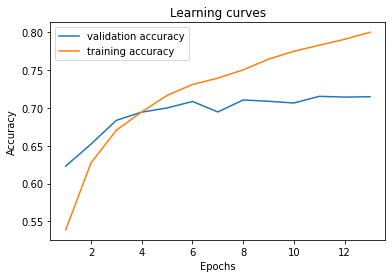

In [ ]:
learning_curves(history.history, 13)

In [ ]:
history = main(create_model_1())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
502/502 [==============================] - 4s 6ms/step - loss: 1.0646 - accuracy: 0.4484 - val_loss: 1.0706 - val_accuracy: 0.4506
Epoch 2/50
502/502 [==============================] - 3s 5ms/step - loss: 1.0358 - accuracy: 0.4761 - val_loss: 1.0099 - val_accuracy: 0.4876
Epoch 3/50
502/502 [==============================] - 3s 6ms/step - loss: 0.9454 - accuracy: 0.5443 - val_loss: 0.8576 - val_accuracy: 0.6014
Epoch 4/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8538 - accuracy: 0.5992 - val_loss: 0.7788 - val_accuracy: 0.6444
Epoch 5/50
502/502 [==============================] - 3s 5ms/step - loss: 0.7996 - accuracy: 0.6280 - val_loss: 0.7413 - val_accuracy: 0.6575
Epoch 6/50
502/502 [==============================] - 3s 6ms/step - loss: 0.7526 - accuracy: 0.6527 - val_loss: 0.7044 - val_accuracy: 0.6843
Epoch 7/50
502/502 [==============================] - 3s 5ms/step - loss: 0.7196 - accuracy: 0.6698 - val_loss: 0.7014 - val_accuracy: 0.6944
Epoch 

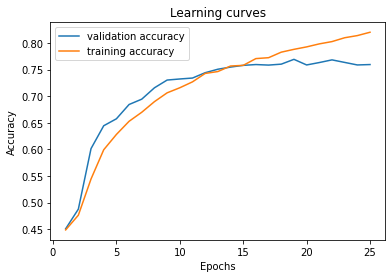

In [ ]:
learning_curves(history.history, 25)

In [ ]:
history = main(create_model_2())

Epoch 1/50
502/502 [==============================] - 5s 9ms/step - loss: 1.0680 - accuracy: 0.4489 - val_loss: 1.0504 - val_accuracy: 0.4458
Epoch 2/50
502/502 [==============================] - 4s 8ms/step - loss: 0.9800 - accuracy: 0.5145 - val_loss: 0.8974 - val_accuracy: 0.5715
Epoch 3/50
502/502 [==============================] - 4s 8ms/step - loss: 0.8782 - accuracy: 0.5875 - val_loss: 0.8221 - val_accuracy: 0.6140
Epoch 4/50
502/502 [==============================] - 4s 8ms/step - loss: 0.8122 - accuracy: 0.6262 - val_loss: 0.7627 - val_accuracy: 0.6534
Epoch 5/50
502/502 [==============================] - 4s 8ms/step - loss: 0.7675 - accuracy: 0.6471 - val_loss: 0.7169 - val_accuracy: 0.6693
Epoch 6/50
502/502 [==============================] - 4s 8ms/step - loss: 0.7285 - accuracy: 0.6688 - val_loss: 0.6732 - val_accuracy: 0.6964
Epoch 7/50
502/502 [==============================] - 4s 8ms/step - loss: 0.6968 - accuracy: 0.6867 - val_loss: 0.6518 - val_accuracy: 0.7047
Epoch 

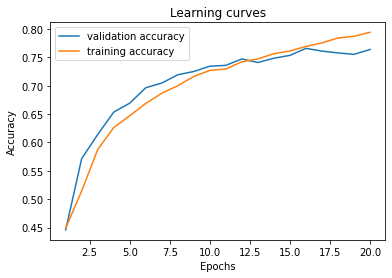

In [ ]:
learning_curves(history.history, 20)

In [ ]:
def create_model_3():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
history = main(create_model_3())

Epoch 1/50
502/502 [==============================] - 21s 9ms/step - loss: 1.0648 - accuracy: 0.4498 - val_loss: 1.0608 - val_accuracy: 0.4725
Epoch 2/50
502/502 [==============================] - 4s 8ms/step - loss: 1.0168 - accuracy: 0.4906 - val_loss: 0.9677 - val_accuracy: 0.5137
Epoch 3/50
502/502 [==============================] - 4s 8ms/step - loss: 0.9152 - accuracy: 0.5600 - val_loss: 0.8921 - val_accuracy: 0.5780
Epoch 4/50
502/502 [==============================] - 4s 9ms/step - loss: 0.8549 - accuracy: 0.5959 - val_loss: 0.8044 - val_accuracy: 0.6285
Epoch 5/50
502/502 [==============================] - 4s 8ms/step - loss: 0.8079 - accuracy: 0.6236 - val_loss: 0.7500 - val_accuracy: 0.6597
Epoch 6/50
502/502 [==============================] - 4s 8ms/step - loss: 0.7782 - accuracy: 0.6406 - val_loss: 0.7292 - val_accuracy: 0.6647
Epoch 7/50
502/502 [==============================] - 4s 9ms/step - loss: 0.7435 - accuracy: 0.6585 - val_loss: 0.7095 - val_accuracy: 0.6803
Epoch

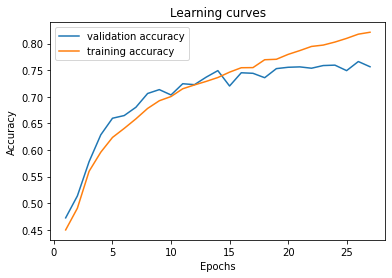

In [ ]:
learning_curves(history.history, 27)

In [ ]:
def create_model_4():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.05)))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
history = main(create_model_4())

Epoch 1/50
502/502 [==============================] - 5s 7ms/step - loss: 1.7216 - accuracy: 0.4499 - val_loss: 1.0653 - val_accuracy: 0.4458
Epoch 2/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0555 - accuracy: 0.4601 - val_loss: 1.0490 - val_accuracy: 0.4835
Epoch 3/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0237 - accuracy: 0.4921 - val_loss: 0.9639 - val_accuracy: 0.5514
Epoch 4/50
502/502 [==============================] - 3s 6ms/step - loss: 0.9469 - accuracy: 0.5503 - val_loss: 0.8870 - val_accuracy: 0.5901
Epoch 5/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8966 - accuracy: 0.5736 - val_loss: 0.8490 - val_accuracy: 0.6120
Epoch 6/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8537 - accuracy: 0.5958 - val_loss: 0.8001 - val_accuracy: 0.6343
Epoch 7/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8256 - accuracy: 0.6120 - val_loss: 0.7755 - val_accuracy: 0.6419
Epoch 

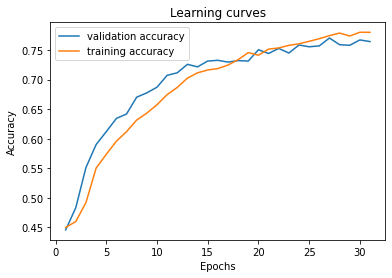

In [ ]:
learning_curves(history.history, 31)

In [ ]:
def create_model_5():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.08)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
history = main(create_model_5())

Epoch 1/50
502/502 [==============================] - 4s 7ms/step - loss: 2.0970 - accuracy: 0.4489 - val_loss: 1.0683 - val_accuracy: 0.4458
Epoch 2/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0594 - accuracy: 0.4582 - val_loss: 1.0528 - val_accuracy: 0.4763
Epoch 3/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0484 - accuracy: 0.4709 - val_loss: 1.0363 - val_accuracy: 0.4858
Epoch 4/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0102 - accuracy: 0.5054 - val_loss: 0.9313 - val_accuracy: 0.5700
Epoch 5/50
502/502 [==============================] - 3s 6ms/step - loss: 0.9240 - accuracy: 0.5601 - val_loss: 0.8693 - val_accuracy: 0.5843
Epoch 6/50
502/502 [==============================] - 3s 7ms/step - loss: 0.8715 - accuracy: 0.5825 - val_loss: 0.8269 - val_accuracy: 0.6117
Epoch 7/50
502/502 [==============================] - 3s 7ms/step - loss: 0.8404 - accuracy: 0.5992 - val_loss: 0.7948 - val_accuracy: 0.6323
Epoch 

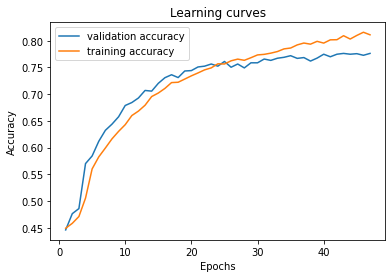

In [ ]:
learning_curves(history.history, 47)

In [ ]:
def create_model_7():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(24, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(240, kernel_size=(3,3), activation='relu', strides=(1,1)))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(tf.keras.layers.Dropout(.4))

  model.add(tf.keras.layers.Conv2D(752, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(tf.keras.layers.Dropout(.4))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

  return model  

In [ ]:
history = main(create_model_7())

Epoch 1/50
502/502 [==============================] - 7s 12ms/step - loss: 4.5052 - accuracy: 0.4171 - val_loss: 3.4541 - val_accuracy: 0.4602
Epoch 2/50
502/502 [==============================] - 5s 11ms/step - loss: 2.7041 - accuracy: 0.4885 - val_loss: 2.2113 - val_accuracy: 0.5119
Epoch 3/50
502/502 [==============================] - 6s 11ms/step - loss: 1.8398 - accuracy: 0.5393 - val_loss: 1.6957 - val_accuracy: 0.5539
Epoch 4/50
502/502 [==============================] - 5s 11ms/step - loss: 1.3876 - accuracy: 0.5727 - val_loss: 1.2308 - val_accuracy: 0.5831
Epoch 5/50
502/502 [==============================] - 5s 11ms/step - loss: 1.1342 - accuracy: 0.6004 - val_loss: 0.9929 - val_accuracy: 0.6502
Epoch 6/50
502/502 [==============================] - 6s 11ms/step - loss: 0.9882 - accuracy: 0.6289 - val_loss: 0.8981 - val_accuracy: 0.6426
Epoch 7/50
502/502 [==============================] - 6s 11ms/step - loss: 0.8975 - accuracy: 0.6506 - val_loss: 0.8241 - val_accuracy: 0.6768

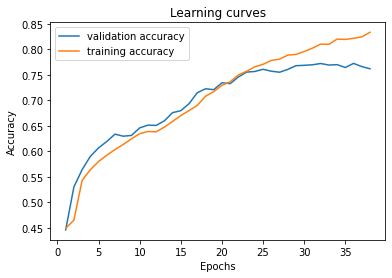

In [ ]:
learning_curves(history.history, 38)

In [ ]:
def create_model_6():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))
 
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))

  model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.09)))
  # model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Dropout(.3))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(300, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

  return model  

In [ ]:
history = main(create_model_6())

Epoch 1/50
502/502 [==============================] - 4s 6ms/step - loss: 1.7454 - accuracy: 0.4493 - val_loss: 1.0565 - val_accuracy: 0.4544
Epoch 2/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0563 - accuracy: 0.4687 - val_loss: 1.0456 - val_accuracy: 0.4732
Epoch 3/50
502/502 [==============================] - 3s 6ms/step - loss: 1.0358 - accuracy: 0.4872 - val_loss: 0.9778 - val_accuracy: 0.5285
Epoch 4/50
502/502 [==============================] - 3s 6ms/step - loss: 0.9610 - accuracy: 0.5400 - val_loss: 0.9258 - val_accuracy: 0.5439
Epoch 5/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8960 - accuracy: 0.5725 - val_loss: 0.8423 - val_accuracy: 0.6062
Epoch 6/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8475 - accuracy: 0.5996 - val_loss: 0.8162 - val_accuracy: 0.6170
Epoch 7/50
502/502 [==============================] - 3s 6ms/step - loss: 0.8234 - accuracy: 0.6050 - val_loss: 0.7816 - val_accuracy: 0.6275
Epoch 

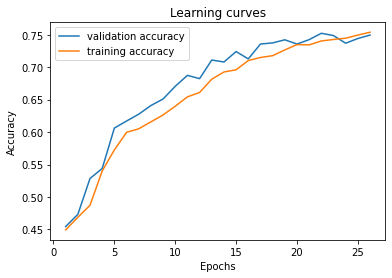

In [ ]:
learning_curves(history.history, 26)